<a href="https://colab.research.google.com/github/OnkarMulay10/EEG_Epilepsy/blob/main/EEG_epilepsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer

In [ ]:
d=pd.read_csv('data.csv')
print(d.shape)

(11500, 180)


In [ ]:
d.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,0.009801,0.013794,0.016626,0.016190,0.013939,0.009075,0.003993,-0.000653,-0.002396,-0.002759,-0.000726,0.002541,0.004646,0.008204,0.011035,0.011906,0.009220,0.003630,-0.003412,-0.008785,-0.010019,-0.009075,-0.007333,-0.003630,0.000799,0.002831,0.001742,0.003485,0.004646,0.003340,0.000944,-0.001379,-0.004429,-0.006970,-0.009438,-0.009583,-0.008422,-0.008349,-0.005155,-0.001016,...,0.003122,0.003920,0.006534,0.008059,0.007768,0.004646,0.002323,0.001307,-0.001815,-0.005009,-0.004719,-0.003194,-0.002396,-0.004138,-0.006389,-0.008276,-0.009438,-0.008276,-0.006026,-0.003848,-0.005735,-0.005227,-0.006171,-0.007913,-0.007115,-0.005227,-0.004719,-0.004574,-0.000799,0.000726,0.000581,-0.001234,-0.001089,-0.002251,-0.005590,-0.007478,-0.009220,-0.008422,-0.006026,-0.003703
X15.V1.924,0.005773,0.005713,0.005324,0.004950,0.004786,0.004711,0.004592,0.004068,0.003649,0.003470,0.003545,0.003859,0.003171,0.000030,-0.003993,-0.009048,-0.012713,-0.014971,-0.016586,-0.016302,-0.014463,-0.011157,-0.006940,-0.002273,0.001765,0.004756,0.006386,0.007074,0.007254,0.006685,0.005938,0.005070,0.004666,0.004696,0.004876,0.005010,0.004965,0.004846,0.004636,0.004666,...,-0.002034,0.000404,0.002184,0.003425,0.004023,0.004442,0.004592,0.004532,0.004562,0.004577,0.004592,0.004188,0.003455,0.002378,0.001271,0.000763,0.000643,0.000927,0.000942,0.000942,0.001032,0.001331,0.001840,0.002034,0.001899,0.001526,0.001421,0.001570,0.001959,0.002438,0.002513,0.002453,0.002243,0.002184,0.002273,0.002348,0.002333,0.002303,0.002139,0.001929
X8.V1.1,-0.003334,-0.004063,-0.004897,-0.003855,-0.003334,-0.003751,-0.005939,-0.007606,-0.008856,-0.009794,-0.010315,-0.009794,-0.010002,-0.010836,-0.010731,-0.009585,-0.007814,-0.007189,-0.007189,-0.005522,-0.003855,-0.001459,-0.001042,-0.004063,-0.008127,-0.010627,-0.010210,-0.008335,-0.005626,-0.004168,-0.003647,-0.004063,-0.003334,-0.001354,0.000729,0.003542,0.004272,0.003438,0.000625,-0.001563,...,-0.005626,-0.008543,-0.011148,-0.013128,-0.012919,-0.011252,-0.008752,-0.007085,-0.006355,-0.005835,-0.006564,-0.006460,-0.003438,0.000104,0.002917,0.004688,0.003855,0.005001,0.006460,0.008335,0.006876,0.002396,-0.001146,-0.004063,-0.004584,-0.004376,-0.004688,-0.005001,-0.004376,-0.000625,0.003021,0.005939,0.006668,0.005001,0.001980,-0.001250,-0.003126,-0.003647,-0.003647,-0.003751
X16.V1.60,-0.008560,-0.008234,-0.007827,-0.007500,-0.007256,-0.007745,-0.008316,-0.008153,-0.007093,-0.006441,-0.005870,-0.005544,-0.006033,-0.006522,-0.006767,-0.005951,-0.005544,-0.004973,-0.004729,-0.004810,-0.005218,-0.006441,-0.006848,-0.007908,-0.007663,-0.006848,-0.006278,-0.006114,-0.005870,-0.005544,-0.006196,-0.006196,-0.005870,-0.005462,-0.005625,-0.005625,-0.005625,-0.005462,-0.005544,-0.005625,...,-0.004973,-0.005625,-0.005381,-0.006033,-0.005625,-0.004973,-0.004158,-0.003669,-0.003669,-0.003995,-0.004729,-0.005218,-0.006359,-0.006522,-0.007337,-0.007093,-0.006767,-0.006359,-0.005218,-0.003098,-0.001794,-0.002364,-0.003424,-0.004158,-0.005544,-0.005788,-0.005625,-0.005625,-0.006033,-0.006033,-0.006522,-0.006685,-0.006604,-0.006522,-0.006278,-0.006930,-0.006278,-0.005870,-0.005625,-0.005299
X20.V1.54,-0.001635,-0.011810,-0.017805,-0.018532,-0.014172,-0.008721,-0.002907,0.000000,-0.003815,-0.010719,-0.016352,-0.018714,-0.015262,-0.007812,-0.001635,0.000545,-0.003815,-0.010901,-0.017442,-0.018714,-0.013626,-0.005269,0.002544,0.009993,0.014172,0.013263,0.005087,-0.002362,-0.007812,-0.012355,-0.014172,-0.013626,-0.009993,-0.007449,-0.003452,-0.003634,-0.005269,-0.006541,-0.003634,0.000182,...,0.006722,0.006

##Data Transformation and Normalization


##Balanced Dataset

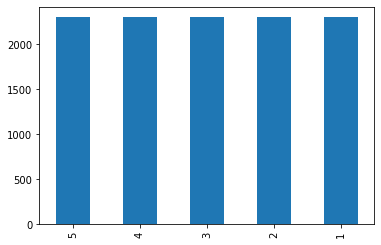

In [ ]:
d['y'].value_counts().plot(kind='bar');

In [ ]:
d.rename(columns={ d.columns[0]: "Index" }, inplace = True)
d = d.set_index(d['Index'])
d.drop('Index',axis='columns',inplace=True)
y=d.y
d.drop('y',axis='columns',inplace=True)
d.iloc[:,:] = Normalizer(norm='l1').fit_transform(d)